In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
cars_df = pd.read_csv(r'C:\Users\SUNKANMI\Desktop\Kaggle\Car_Sales_Ad/car_ad.csv', encoding="ISO-8859-1")

cars_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
print(cars_df.shape)
print(cars_df.isnull().sum())

(9576, 10)
car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64


As observed, there are 434 misssing values for the Engine Volume and 511 missing values for the type of Drive.

Lets also see which of the columns have uniques values

In [4]:
print('There are {} unique cars in the dataset'.format(cars_df.car.nunique()))
print('There are {} unique body types in the dataset'.format(cars_df.body.nunique()))
print('There are {} unique models in the dataset'.format(cars_df.model.nunique()))
print('There are {} unique engine types in the dataset'.format(cars_df.engType.nunique()))

There are 87 unique cars in the dataset
There are 6 unique body types in the dataset
There are 888 unique models in the dataset
There are 4 unique engine types in the dataset


### Dealing with Missing Values
lets deal with the missing values in our dataset

In [5]:
print('There are {} missing values in the Engine Volume column'.format(cars_df.engV.isnull().sum()))
print('We can impute these values using the mean of {} or its median of {}'.format(cars_df.engV.mean(), 
                                                                                     cars_df.engV.median()))

There are 434 missing values in the Engine Volume column
We can impute these values using the mean of 2.646344344782306 or its median of 2.0


In [6]:
print('There are {} missing values in the Drive column'.format(cars_df.drive.isnull().sum()))
print('There are {} unique drive types in the dataset'.format(cars_df.drive.nunique()))
print('The most common is the {} wheel drive with {} counts in the dataset'.format(cars_df.drive.value_counts().idxmax(), 
                                                                                   cars_df.drive.value_counts().max()))

There are 511 missing values in the Drive column
There are 3 unique drive types in the dataset
The most common is the front wheel drive with 5188 counts in the dataset


In [7]:
cars_df.engV.fillna(value=cars_df.engV.median(), inplace=True)
cars_df.drive.fillna(value=cars_df.drive.value_counts().idxmax(), inplace=True)
cars_df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

# Exploratory Data Analysis

Lets observe the relationship between the Price and some of our features

C:\Users\SUNKANMI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


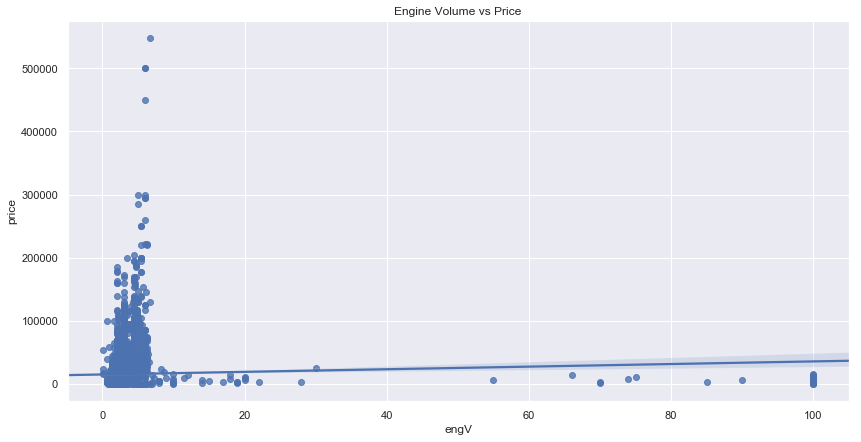

In [8]:
plt.figure(figsize=(14, 7))
plt.title('Engine Volume vs Price')
sns.regplot(x='engV', y='price', data=cars_df)

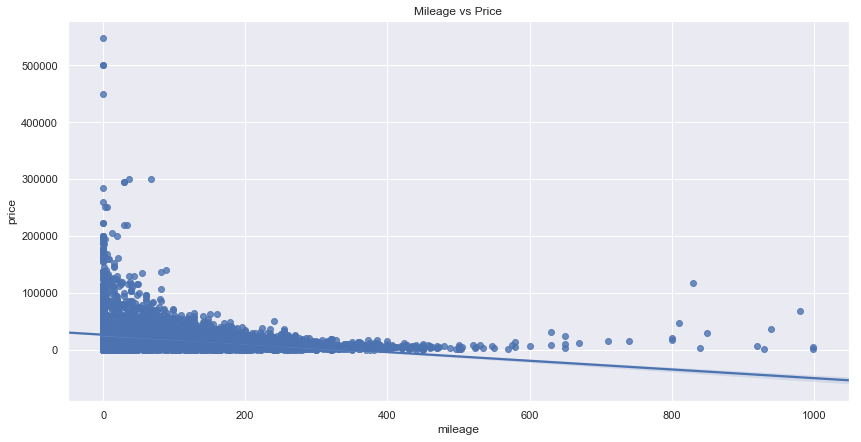

In [9]:
plt.figure(figsize=(14, 7))
plt.title('Mileage vs Price')
sns.regplot(x='mileage', y='price', data=cars_df)

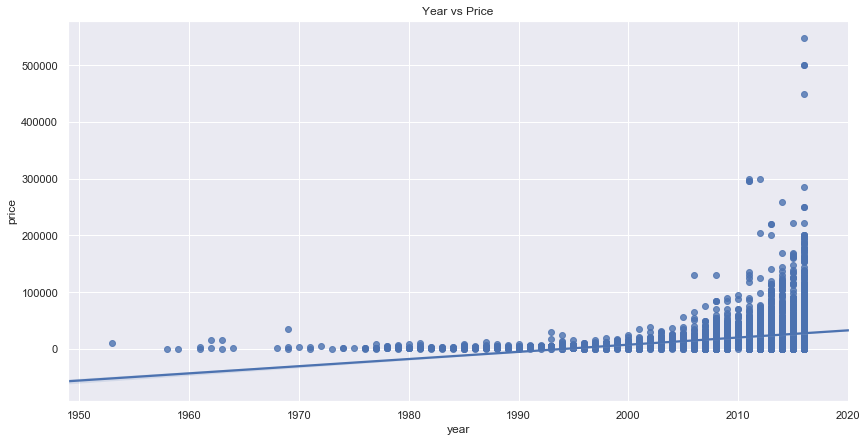

In [10]:
plt.figure(figsize=(14, 7))
plt.title('Year vs Price')
sns.regplot(x='year', y='price', data=cars_df)

In [11]:
cars_df.year.max()

2016

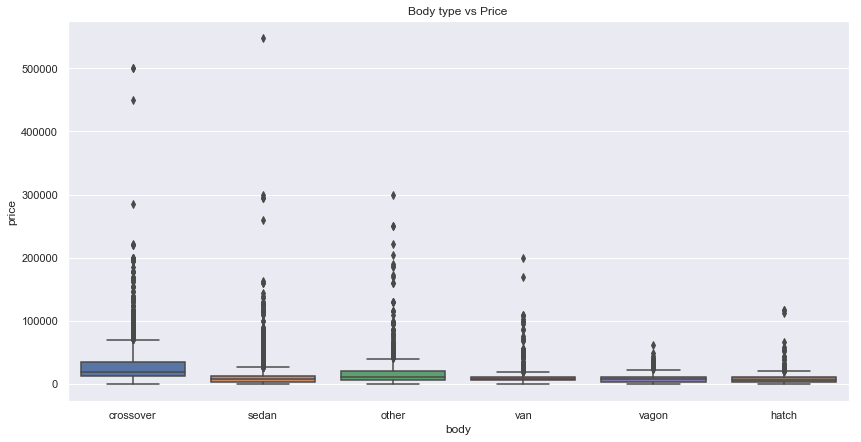

In [12]:
plt.figure(figsize=(14, 7))
plt.title('Body type vs Price')
sns.boxplot(x='body', y='price', data=cars_df)

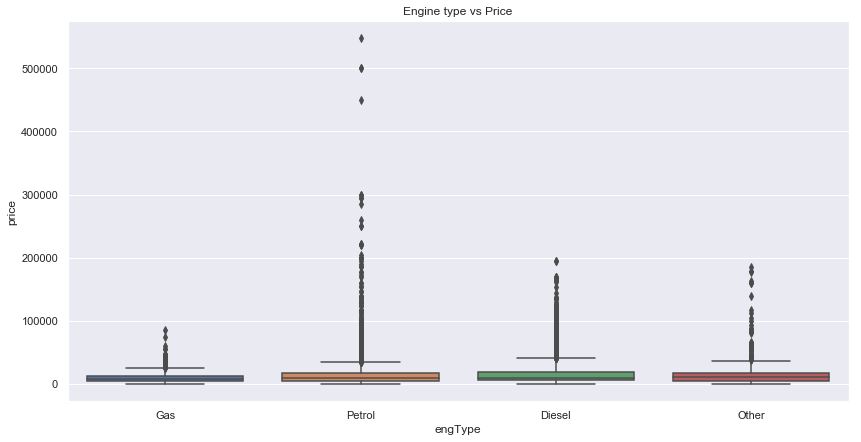

In [13]:
plt.figure(figsize=(14, 7))
plt.title('Engine type vs Price')
sns.boxplot(x='engType', y='price', data=cars_df)

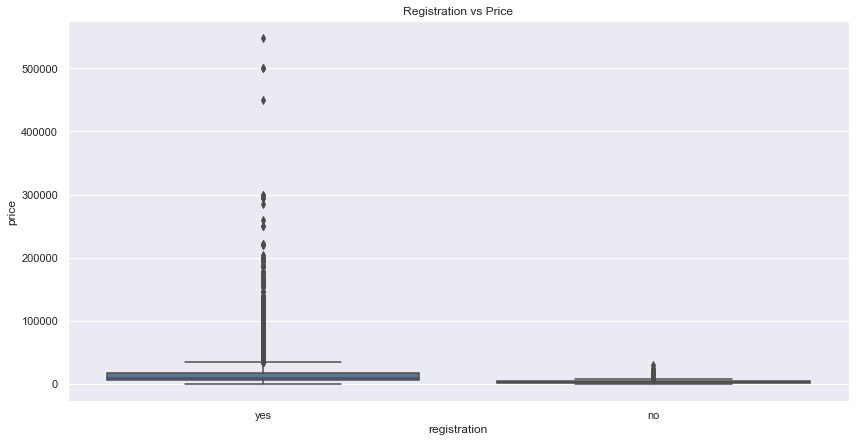

In [14]:
plt.figure(figsize=(14, 7))
plt.title('Registration vs Price')
sns.boxplot(x='registration', y='price', data=cars_df)

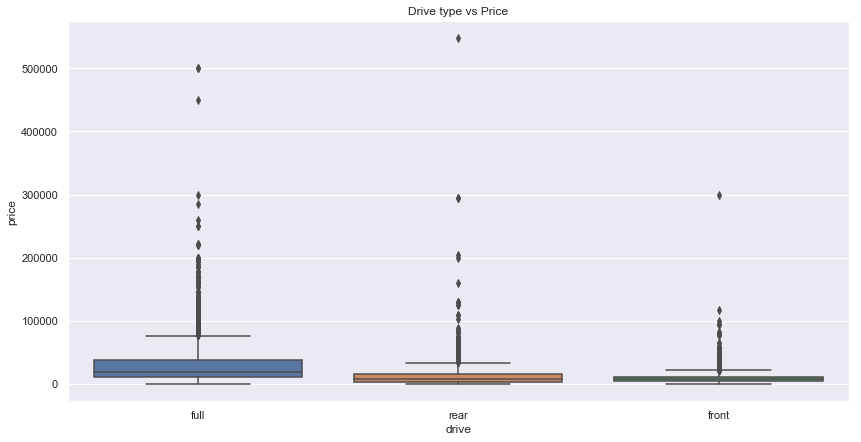

In [15]:
plt.figure(figsize=(14, 7))
plt.title('Drive type vs Price')
sns.boxplot(x='drive', y='price', data=cars_df)

**Analyzing the Price**

Since this is a regression problem, its always good to take a close look at the **price** column

In [16]:
print(cars_df[cars_df['price']==0].shape)
cars_df[cars_df['price']==0].head()

(267, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full


Apparently, there are 267 rows with a price of **0.0**, as this is very minute compared to our entire dataset, we'll drop all the rows with no price.

In [17]:
cars_df = cars_df[cars_df['price']>0]
cars_df[cars_df['price']==0].shape

(0, 10)

7.1129147348625485


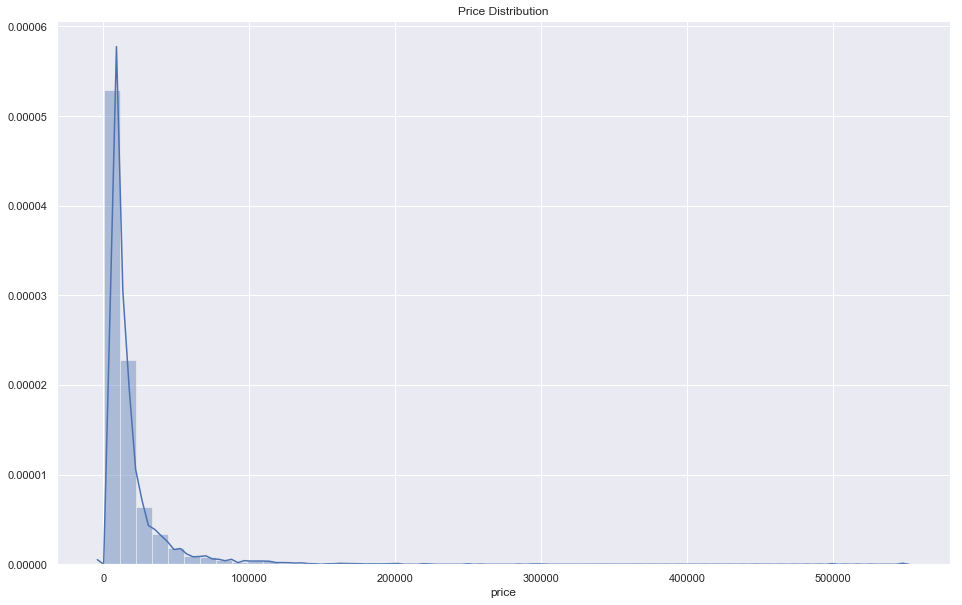

In [18]:
print(cars_df.price.skew())

plt.figure(figsize=(16, 10))
plt.title('Price Distribution')
sns.distplot(cars_df.price);

It appears our distribution shows peakedness and we is positively skewed! Lets rectify that! 

0.15614187037787344


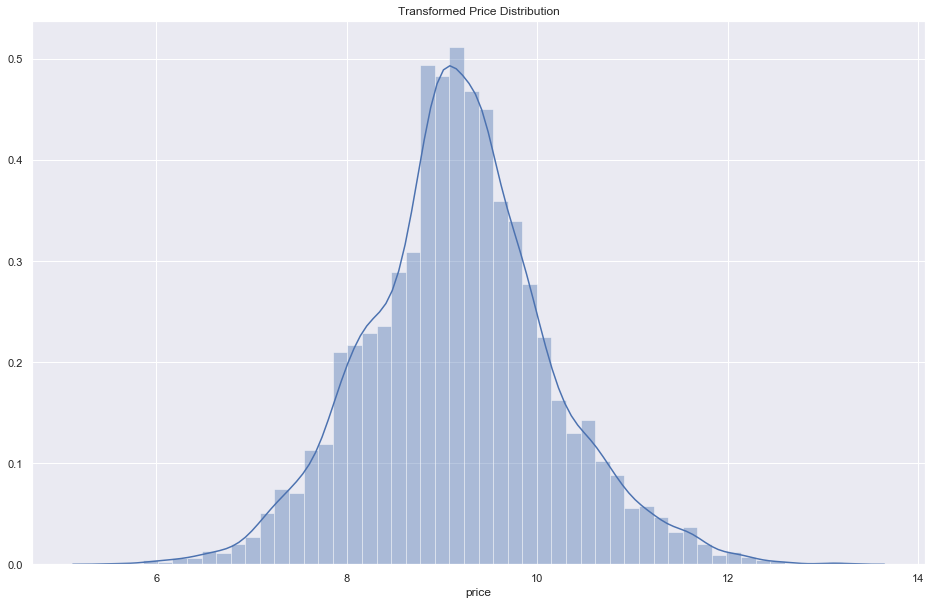

In [19]:
target = np.log(cars_df.price)
print(target.skew())

plt.figure(figsize=(16, 10))
plt.title('Transformed Price Distribution')
sns.distplot(target);

We performed a logrithimic transformation on our price distribution and as we can see, we have a relatively normal distribution.

### Label Encoding

Since machines only understand numbers, lol!!

In [20]:
from sklearn.preprocessing import LabelEncoder

for c in cars_df.columns:
    if cars_df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(cars_df[c].values))
        cars_df[c] = lbl.transform(list(cars_df[c].values))

In [21]:
cars_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,25,15500.0,0,68,2.5,1,1,2010,490,1
1,52,20500.0,3,173,1.8,1,1,2011,332,2
2,52,35000.0,2,135,5.5,3,1,2008,240,2
3,52,17800.0,5,162,1.8,0,1,2012,206,0
4,52,33000.0,4,91,2.0,2,1,2013,332,0


# Model Selection and Training

In [22]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
import xgboost as xgb

In [23]:
X = cars_df.drop(['price'], axis=1)
y = np.log(cars_df.price)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**XGboost**

In [25]:
xgb_params = {
    'eta': 0.05,
    'max_depth':5,
    'subsample':0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'silent':1
}

In [26]:
train_matrix = xgb.DMatrix(X_train, y_train)

C:\Users\SUNKANMI\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [27]:
cv_output = xgb.cv(xgb_params, train_matrix, num_boost_round=1000, early_stopping_rounds=20,
                  verbose_eval=50, show_stdv=False)

[0]	train-rmse:8.30181	test-rmse:8.30178
[50]	train-rmse:0.728589	test-rmse:0.738187
[100]	train-rmse:0.271664	test-rmse:0.306003
[150]	train-rmse:0.241612	test-rmse:0.285616
[200]	train-rmse:0.225062	test-rmse:0.277166
[250]	train-rmse:0.211382	test-rmse:0.271492
[300]	train-rmse:0.199872	test-rmse:0.267141
[350]	train-rmse:0.190368	test-rmse:0.263971
[400]	train-rmse:0.182177	test-rmse:0.261913
[450]	train-rmse:0.174487	test-rmse:0.259878
[500]	train-rmse:0.16774	test-rmse:0.25873
[550]	train-rmse:0.161596	test-rmse:0.25772
[600]	train-rmse:0.156018	test-rmse:0.25677
[650]	train-rmse:0.150963	test-rmse:0.256007
[700]	train-rmse:0.145994	test-rmse:0.25533


In [28]:
num_boost_rounds = len(cv_output)
xgb_model = xgb.train(dict(xgb_params, silent=0), train_matrix,
                     num_boost_round=num_boost_rounds)

Now lets take a look at which features are the most important.

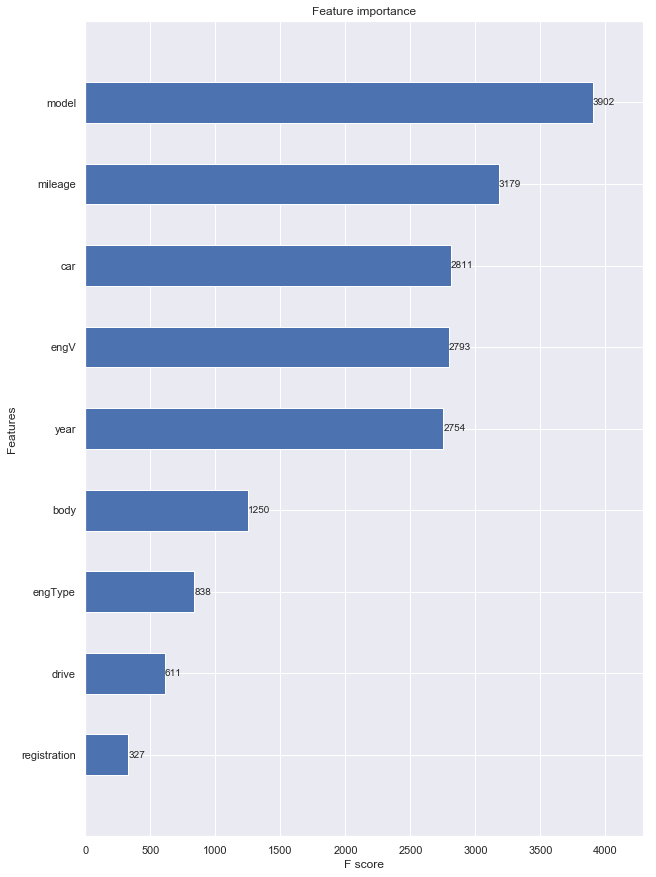

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10, 15))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax)

Lets make some predictions, right?. LETS GO!!!

In [30]:
test_matrix = xgb.DMatrix(X_test)

y_preds = xgb_model.predict(test_matrix)
y_preds = np.exp(y_preds)

test_df = pd.DataFrame({
    'Actual_price': np.exp(y_test),
    'Predicted_Price': y_preds,
    'Difference': (np.exp(y_test) - y_preds)
})

test_df.head()

,Actual_price,Predicted_Price,Difference
6154,8500.0,9350.058594,-850.058594
144,109999.0,115425.289062,-5426.289062
3627,14700.0,14300.808594,399.191406
4541,12400.0,11404.926758,995.073242
3200,10200.0,11904.448242,-1704.448242


**Save Model**

In [31]:
from sklearn.externals import joblib

In [32]:
filename = 'cars_model.pkl'
joblib.dump(xgb_model, filename=filename)

['cars_model.pkl']